In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
import unidecode
import re, math
import warnings
warnings.filterwarnings('ignore')

### Functions

In [58]:
def dict_dtypes(df):
    g = df.columns.to_series().groupby(df.dtypes).groups
    dict_dtypes = {k.name: v for k, v in g.items()}
    return dict_dtypes

def normalize_string(phrase):
    accented_string = str(phrase)
    unaccented_string = unidecode.unidecode(accented_string).lower()
    for p in list(punctuation):
        unaccented_string = unaccented_string.replace(p,' ')
    return unaccented_string

def treat_installsource(df, column_name):
    df.loc[df[column_name].str.contains('facebook', case=False), column_name] = 'facebook'
    df.loc[df[column_name].str.contains('google', case=False), column_name] = 'google'
    df.loc[df[column_name].str.contains('instagram', case=False), column_name] = 'instagram'
    df.loc[df[column_name].str.contains('comparaonlinecredito'), column_name] = 'comparaonlinecredito'
    df.loc[df[column_name].str.contains('crm', case=False), column_name] = 'crm'
    df.loc[df[column_name].str.contains('organic', case=False), column_name] = 'organic'
    df.loc[df[column_name].str.contains('foregon'), column_name] = 'foregon'
    df.loc[df[column_name].str.contains('comparaemailcredito', case=False), column_name] = 'comparaemailcredito'
    df.loc[df[column_name].str.contains('neonmaislp'), column_name] = 'neonmaislp'
    df.loc[df[column_name].str.contains('optimise', case=False), column_name] = 'optimise'
    df.loc[df[column_name].str.contains('siteneon', case=False), column_name] = 'siteneon'
    df.loc[df[column_name].str.contains('jovemnerd', case=False), column_name] = 'jovemnerd'
    df.loc[(df[column_name] != 'facebook') & (df[column_name] != 'google') & (df[column_name] != 'instagram') & (
                df[column_name] != 'comparaonlinecredito') \
           & (df[column_name] != 'crm') & (df[column_name] != 'organic') & (df[column_name] != 'foregon') & (
                       df[column_name] != 'comparaemailcredito') & (df[column_name] != 'neonmaislp') \
           & (df[column_name] != 'optimise') & (df[column_name] != 'siteneon') & (
                       df[column_name] != 'jovemnerd'), column_name] = 'others'
    return df

    
    
def treat_adressstate(df, column_name): 
    df.loc[df[column_name].str.contains('ceara', case=False), column_name] = 'ce'
    df.loc[df[column_name].str.contains('bahia', case=False), column_name] = 'ba'
    df.loc[df[column_name].str.contains('rio de janeiro', case=False), column_name] = 'rj'
    df.loc[df[column_name].str.contains('piaui'), column_name] = 'pi'
    df.loc[df['AddressState'].str.contains('goias', case=False), 'AddressState'] = 'go'
    return df

    
def treat_device(df, column_name):
    df.loc[df[column_name].str.contains('motorola.*g', case=False), column_name] = 'motog'
    df.loc[df[column_name].str.contains('motorola.*e', case=False), column_name] = 'motoe'
    df.loc[df[column_name].str.contains('motorola.*x', case=False), column_name] = 'motox'
    df.loc[df[column_name].str.contains('motorola'), column_name] = 'moto'
    df.loc[df[column_name].str.contains('samsung.*g', case=False), column_name] = 'samsg'
    df.loc[df[column_name].str.contains('samsung.*j', case=False), column_name] = 'samsj'
    df.loc[df[column_name].str.contains('samsung.*'), column_name] = 'sams'
    df.loc[df[column_name].str.contains('lg.*m', case=False), column_name] = 'lgm'
    df.loc[df[column_name].str.contains('lg.*'), column_name] = 'lg'
    df.loc[df[column_name].str.contains('xiaomi.*', case=False), column_name] = 'xiaomi'
    df.loc[df[column_name].str.contains('asus.*', case=False), column_name] = 'asus'
    df.loc[df[column_name].str.contains('ipad.*', case=False), column_name] = 'iphone'
    df.loc[df[column_name].str.contains('iphone.*', case=False), column_name] = 'iphone'
    df.loc[(df[column_name] != 'motog') & (df[column_name] != 'motoe') & (df[column_name] != 'motox') & (
                df[column_name] != 'moto') \
           & (df[column_name] != 'samsg') & (df[column_name] != 'samsj') & (df[column_name] != 'sams') & (
                       df[column_name] != 'lgm') & (df[column_name] != 'lg') \
           & (df[column_name] != 'xiaomi') & (df[column_name] != 'asus') & (
                       df[column_name] != 'iphone'), column_name] = 'others'
    return df

def binarize_atraso(x):
    if x>0:
        return 1
    else: 
        return 0

## 1. Load Data

In [59]:
df = pd.read_csv('../data/interim/out3.csv')

In [60]:
df.rename(columns ={'CLIENTID':'ClientId'}, inplace=True)

In [61]:
df['SKProductFirstTransaction'] = df['SKProductFirstTransaction'].astype(str)
df['ClientId'] = df['ClientId'].astype(str)
df['EVER60'] = df['EVER60'].astype(str)

# df['Atraso_1']= df['Atraso_1'].apply(lambda x: binarize_atraso(x)).astype(int)
# df['Atraso_2']= df['Atraso_2'].apply(lambda x: binarize_atraso(x)).astype(int)
# df['Atraso_3']= df['Atraso_4'].apply(lambda x: binarize_atraso(x)).astype(int)
# df['Atraso_4']= df['Atraso_4'].apply(lambda x: binarize_atraso(x)).astype(int)

In [62]:
dict_dtypes(df)

{'int64': Index(['FlagInvitedUser', 'FlagEmployee', 'PossuiVeiculo'], dtype='object'),
 'float64': Index(['VALUE_ACCOUNT_CREDIT_INFLOW', 'VALUE_NOT_CATEGORIZED_INFLOW',
        'VALUE_INVOICE_PAYMENT_INFLOW', 'VALUE_INSTALLMENT_PAYMENT_INFLOW',
        'VALUE_GIFTS_INFLOW', 'VALUE_RECEIPTS_INFLOW',
        'VALUE_SUBSCRIPTIONS_SERVICES_OUTFLOW',
        'VALUE_BARS_RESTAURANTS_OUTFLOW', 'VALUE_PERSONAL_CARE_OUTFLOW',
        'VALUE_SEND_OUTFLOW', 'VALUE_RECREATION_OUTFLOW',
        'VALUE_MARKETPLACE_OUTFLOW', 'VALUE_HOME_RENT_OUTFLOW',
        'VALUE_NOT_CATEGORIZED_OUTFLOW', 'VALUE_OTHERS_OUTFLOW',
        'VALUE_INVOICE_PAYMENT_OUTFLOW', 'VALUE_HEALTH_OUTFLOW',
        'VALUE_TRANSPORTATION', 'VALUE_CLOTHES_OUTFLOW',
        'PARCELING_REMAINING_VALUE', 'PARCELING_COUNT_NOT_PAID_YET',
        'VALUE_PRODUCT_CARD_OUTFLOW', 'VALUE_PRODUCT_CREDIT_CARD_OUTFLOW',
        'VALUE_PRODUCT_TAXES_OUTFLOW', 'VALUE_PRODUCT_OBJECTIVES_OUTFLOW',
        'VALUE_PRODUCT_OTHERS_OUTFLOW', 'VALUE_PROD

Atencao: os clientes se repetem porque podem estar em mais de um M0

## 2. Normalizacao texto

In [63]:
df.head()

ClientId EVER60          M0  VALUE_ACCOUNT_CREDIT_INFLOW  \
0  1022285      0  2019-05-03                        25.00   
1  1573997      0  2019-05-24                         0.00   
2   152251      0  2019-05-17                      1450.00   
3  1245851      0  2019-05-17                         0.00   
4   638762      0  2019-05-31                      3469.19   

   VALUE_NOT_CATEGORIZED_INFLOW  VALUE_INVOICE_PAYMENT_INFLOW  \
0                          0.00                       3441.47   
1                          0.00                          0.00   
2                          0.00                       1120.58   
3                        189.47                        345.26   
4                          0.00                        741.12   

   VALUE_INSTALLMENT_PAYMENT_INFLOW  VALUE_GIFTS_INFLOW  \
0                               0.0                15.0   
1                               0.0                 0.0   
2                             900.8                 0.0   
3                               0.0                 0.0   
4                            4614.0                 0.0   

   VALUE_RECEIPTS_INFLOW  VALUE_SUBSCRIPTIONS_SERVICES_OUTFLOW  ...  \
0                    0.0                                 57.00  ...   
1                    0.0                                  0.00  ...   
2                    0.0                                187.59  ...   
3                    0.0                                 91.80  ...   
4                 1035.9                                183.17  ...   

   FlagInvitedUser  FlagEmployee  PossuiVeiculo  DeclaredIncome  \
0                0             0              0         20000.0   
1                0             0              0          2000.0   
2                0             0              0             NaN   
3                0             0              0          2500.0   
4                0             0              0             NaN   

   StartDepositValue    Renda  SALDO_CRED_DISP_M_4  SALDO_CRED_DISP_M_3  \
0               10.0  6849.68                 0.00                 0.00   
1               10.0   712.14                  NaN                  NaN   
2                NaN      NaN                 0.00              1118.12   
3               10.0  1007.92                 0.00                 0.00   
4                NaN      NaN              1045.28               872.27   

   SALDO_CRED_DISP_M_2  SALDO_CRED_DISP_M_1  
0              7010.61              3665.22  
1                  NaN                  NaN  
2               845.68              1987.58  
3               245.22               133.93  
4               761.46               634.55  

[5 rows x 68 columns]

In [64]:
df['Platform'] = df['Platform'].apply(lambda x: normalize_string(x))
df['Device'] = df['Device'].apply(lambda x: normalize_string(x))
df['InstallSource'] = df['InstallSource'].apply(lambda x: normalize_string(x))
df['AddressState'] = df['AddressState'].apply(lambda x: normalize_string(x))

In [65]:
df.head()

ClientId EVER60          M0  VALUE_ACCOUNT_CREDIT_INFLOW  \
0  1022285      0  2019-05-03                        25.00   
1  1573997      0  2019-05-24                         0.00   
2   152251      0  2019-05-17                      1450.00   
3  1245851      0  2019-05-17                         0.00   
4   638762      0  2019-05-31                      3469.19   

   VALUE_NOT_CATEGORIZED_INFLOW  VALUE_INVOICE_PAYMENT_INFLOW  \
0                          0.00                       3441.47   
1                          0.00                          0.00   
2                          0.00                       1120.58   
3                        189.47                        345.26   
4                          0.00                        741.12   

   VALUE_INSTALLMENT_PAYMENT_INFLOW  VALUE_GIFTS_INFLOW  \
0                               0.0                15.0   
1                               0.0                 0.0   
2                             900.8                 0.0   
3                               0.0                 0.0   
4                            4614.0                 0.0   

   VALUE_RECEIPTS_INFLOW  VALUE_SUBSCRIPTIONS_SERVICES_OUTFLOW  ...  \
0                    0.0                                 57.00  ...   
1                    0.0                                  0.00  ...   
2                    0.0                                187.59  ...   
3                    0.0                                 91.80  ...   
4                 1035.9                                183.17  ...   

   FlagInvitedUser  FlagEmployee  PossuiVeiculo  DeclaredIncome  \
0                0             0              0         20000.0   
1                0             0              0          2000.0   
2                0             0              0             NaN   
3                0             0              0          2500.0   
4                0             0              0             NaN   

   StartDepositValue    Renda  SALDO_CRED_DISP_M_4  SALDO_CRED_DISP_M_3  \
0               10.0  6849.68                 0.00                 0.00   
1               10.0   712.14                  NaN                  NaN   
2                NaN      NaN                 0.00              1118.12   
3               10.0  1007.92                 0.00                 0.00   
4                NaN      NaN              1045.28               872.27   

   SALDO_CRED_DISP_M_2  SALDO_CRED_DISP_M_1  
0              7010.61              3665.22  
1                  NaN                  NaN  
2               845.68              1987.58  
3               245.22               133.93  
4               761.46               634.55  

[5 rows x 68 columns]

## 3. Variáveis Categóricas

#### DEVICE

In [66]:
df.Device.nunique()

1198

In [67]:
df = treat_device(df, 'Device')

In [68]:
df.Device.nunique()

12

In [69]:
# df.Device.to_excel('../data/devices_to_model.xlsx', index=False)

#### INSTALLSOURCE

In [70]:
df.InstallSource.nunique()

57

In [71]:
df = treat_installsource(df, 'InstallSource')

In [72]:
df.InstallSource.nunique()

13

#### STATE

In [73]:
df.AddressState.nunique()

34

In [74]:
df = treat_adressstate(df, 'AddressState')

In [75]:
df.AddressState.nunique()

29

In [76]:
df.loc[df['AddressState'].str.contains('nan', case=False), 'AddressState'] = 'others'
df.loc[df['AddressState'].str.contains('goias', case=False), 'AddressState'] = 'go'

#### PLATFORM

In [77]:
df.Platform.unique()

array(['android', 'nan', 'iphone os'], dtype=object)

#### SKPRODUCT

In [78]:
df.loc[df['SKProductFirstTransaction'].str.contains('nan', case=False), 'SKProductFirstTransaction'] = 'others'

In [79]:
df.SKProductFirstTransaction.nunique()

19

## 4.Variáveis Transacionais

In [80]:
df= df.fillna(0)

# Save Data

In [81]:
df.to_csv('../data/interim/out4.csv', index = False)

In [82]:
df.count()

ClientId                        599238
EVER60                          599238
M0                              599238
VALUE_ACCOUNT_CREDIT_INFLOW     599238
VALUE_NOT_CATEGORIZED_INFLOW    599238
                                 ...  
Renda                           599238
SALDO_CRED_DISP_M_4             599238
SALDO_CRED_DISP_M_3             599238
SALDO_CRED_DISP_M_2             599238
SALDO_CRED_DISP_M_1             599238
Length: 68, dtype: int64

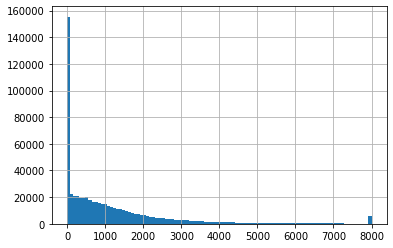

In [83]:
df['VALUE_PRODUCT_CREDIT_CARD_OUTFLOW'].hist(bins=100)

In [84]:
df.count()

ClientId                        599238
EVER60                          599238
M0                              599238
VALUE_ACCOUNT_CREDIT_INFLOW     599238
VALUE_NOT_CATEGORIZED_INFLOW    599238
                                 ...  
Renda                           599238
SALDO_CRED_DISP_M_4             599238
SALDO_CRED_DISP_M_3             599238
SALDO_CRED_DISP_M_2             599238
SALDO_CRED_DISP_M_1             599238
Length: 68, dtype: int64